In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_path = "lena.pgm"

In [3]:
def cv2_imshow(img):
  plt.figure(figsize=(8,8))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#   plt.axis('off')
  plt.show()

# Reading an image in default mode

In [4]:
image = cv2.imread(image_path)

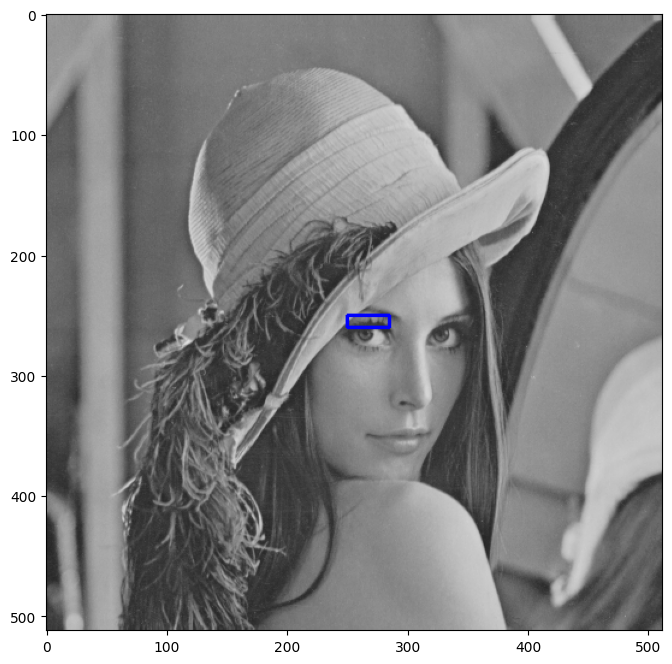

In [5]:
# Window name in which image is displayed
window_name = 'Image'

# Start coordinate, here (5, 5)
# represents the top left corner of rectangle
start_point = (285, 250)

# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (250, 260)

color = (255, 0, 0)
thickness = 2

# Draw a rectangle with blue line borders of thickness of 2 px to see eye
image = cv2.rectangle(image, start_point, end_point, color, thickness)

# Displaying the image 
cv2_imshow(image) 

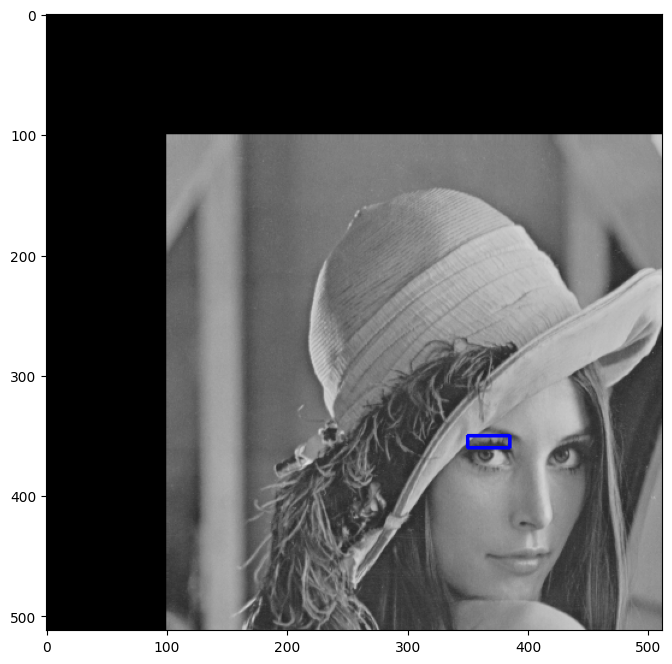

In [7]:
def translate_img(img, shift_distance):
    h, w = img.shape[:2]
    x_distance = shift_distance[0]
    y_distance = shift_distance[1]
    
    ts_mat = np.array([[1, 0, x_distance],
                       [0, 1, y_distance]])
    
    out_img = np.zeros(img.shape, dtype="u1")
    
    for i in range(h):
        for j in range(w):
            origin_xy = np.array([j, i, 1])
            new_xy = np.dot(ts_mat, origin_xy)

            new_x = new_xy[0]
            new_y = new_xy[1]
            # print(new_xy)
            if 0 < new_x < w and 0 < new_y < h:
                out_img[new_y, new_x] = img[i, j]

    return out_img

translated = translate_img(image, shift_distance=(100, 100))
cv2_imshow(translated)